In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('topical_chat.csv')
data

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper
...,...,...,...
188373,8628,"Wow, it does not seem like that long. Since I...",Surprised
188374,8628,"I havent seen that episode, I might google it...",Curious to dive deeper
188375,8628,I don't think I have either. That's an insane...,Curious to dive deeper
188376,8628,"I did, my little brother used to love Thomas ...",Happy


In [3]:
data[data.conversation_id == 1]

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper
5,1,Google is leading the alphabet subsidiary and...,Curious to dive deeper
6,1,Did you know Google had hundreds of live goat...,Curious to dive deeper
7,1,"It is very interesting. Google provide ""Chrom...",Curious to dive deeper
8,1,I like Google Chrome. Do you use it as well f...,Curious to dive deeper
9,1,Yes.Google is the biggest search engine and G...,Curious to dive deeper


In [4]:
set(data.sentiment.values)

{' Angry',
 ' Curious to dive deeper',
 ' Disgusted',
 ' Fearful',
 ' Happy',
 ' Neutral',
 ' Sad',
 ' Surprised'}

In [5]:
sent_as_code = {' Angry': -10,
 ' Curious to dive deeper': 5,
 ' Disgusted': -10,
 ' Fearful': -7,
 ' Happy': 10,
 ' Neutral': 0,
 ' Sad': -7,
 ' Surprised': 1}

In [6]:
d = {}
for i in set(data.conversation_id.values):
    if not i in d:
        d[i] = []
    counter = 0
    for text, emotion in zip(data[data.conversation_id == i].message.values, data[data.conversation_id == i].sentiment.values):
        d[i].append((text, sent_as_code[emotion], counter))
        counter = 1 - counter

In [7]:
d[1]

[(' Are you a fan of Google or Microsoft?', 5, 0),
 (' Both are excellent technology they are helpful in many ways. For the security purpose both are super.',
  5,
  1),
 (" I'm not  a huge fan of Google, but I use it a lot because I have to. I think they are a monopoly in some sense. ",
  5,
  0),
 (' Google provides online related services and products, which includes online ads, search engine and cloud computing.',
  5,
  1),
 (" Yeah, their services are good. I'm just not a fan of intrusive they can be on our personal lives. ",
  5,
  0),
 (' Google is leading the alphabet subsidiary and will continue to be the Umbrella company for Alphabet internet interest.',
  5,
  1),
 (' Did you know Google had hundreds of live goats to cut the grass in the past? ',
  5,
  0),
 (' It is very interesting. Google provide "Chrome OS" which is a light weight OS. Google provided a lot of hardware mainly in 2010 to 2015. ',
  5,
  1),
 (' I like Google Chrome. Do you use it as well for your browser?

In [8]:
emotion_changing_replies = {'query': [], 'reply': [], 'norm': []}

for dialog_id in d:
    for reply_num in range(2, len(d[dialog_id])):
        initial_state = d[dialog_id][reply_num - 2]
        reply = d[dialog_id][reply_num - 1]
        current_state = d[dialog_id][reply_num]
        if current_state[1] - initial_state[1] > 0:
            emotion_changing_replies['query'].append(initial_state[0])
            emotion_changing_replies['reply'].append(reply[0])
            emotion_changing_replies['norm'].append(current_state[1] - initial_state[1])

In [9]:
emotion_spoiling_replies = {'query': [], 'reply': [], 'norm': []}

for dialog_id in d:
    for reply_num in range(2, len(d[dialog_id])):
        initial_state = d[dialog_id][reply_num - 2]
        reply = d[dialog_id][reply_num - 1]
        current_state = d[dialog_id][reply_num]
        if current_state[1] - initial_state[1] < 0:
            emotion_spoiling_replies['query'].append(initial_state[0])
            emotion_spoiling_replies['reply'].append(reply[0])
            emotion_spoiling_replies['norm'].append(current_state[1] - initial_state[1])

In [10]:
happinness_creators = pd.DataFrame(emotion_changing_replies)
happinness_creators

,query,reply,norm
0,Yes. They form a sister group of tourniquets-...,Did you know that a seahorse is the only fish...,5
1,Agreed. The Google headquarters in Mountain V...,thats funny. The current CEO is Sundar Pichai...,1
2,thats funny. The current CEO is Sundar Pichai...,Oh yeah I didn't know that either. I also wan...,1
3,Oh yeah I didn't know that either. I also wan...,say what now?? they have that??,9
4,i had rememered hearing about that before. Im...,That is so funny I guess I never considered a...,1
...,...,...,...
32880,Or maybe football players didnt earn that muc...,I have not but that's some kind of psychologi...,4
32881,I have not but that's some kind of psychologi...,"It must be, it definetely makes you think twi...",5
32882,That is hilarious and I love both shows I als...,I can't believe there were so many. How many ...,5
32883,"Wow, it does not seem like that long. Since I...","I havent seen that episode, I might google it...",4


In [11]:
sadness_creators = pd.DataFrame(emotion_spoiling_replies)
sadness_creators

,query,reply,norm
0,Freshwater fish only drink water through the ...,"Interesting, they also have gills. Did you kn...",-5
1,Hey what's up do use Google very often?I real...,i think everyone must use it daily! its becom...,-5
2,Yeah apparently lol! They do that instead of ...,thats both funny and i guess imaginative. lea...,-9
3,thats both funny and i guess imaginative. lea...,Yeah exactly I am sure they are cheaper. One ...,-1
4,i guess they live up to their name then!,It seems they do. I also didn't know that the...,-1
...,...,...,...
32925,I know! the other team's coach really underpe...,Apparently. In the 60's bowlers made more tha...,-4
32926,I like adult animated series like Archer and ...,That is hilarious and I love both shows I als...,-5
32927,I can't believe there were so many. How many ...,It's like 750 Pokemon episodes and its been a...,-4
32928,It's like 750 Pokemon episodes and its been a...,"Wow, it does not seem like that long. Since I...",-5


In [12]:
happinness_creators.to_csv('happiness_provokers')

In [13]:
happinness_creators[happinness_creators.norm == 20]

,query,reply,norm
281,"I won't even pay to see the rest of them, th...",Absolutely ;) no argument here ;),20
464,Totally agree. It's ridiculous that we don't ...,Some candidates are pushing for it! sadly tho...,20
728,Nope! He got a cat. And I hate that thing. It...,"I agree im more of a dog person myself, maybe...",20
741,I occasionally do that. The pallbearers wore ...,Haha that is either very disrespectful or ver...,20
752,"Yes, that is weird, to sell clothes worn by d...",Exactly! You never know what happened in thos...,20
...,...,...,...
32616,LOL crazy!!! That's almost as wild as Google'...,Maybe they are aggressively searching. I'd li...,20
32637,But why doesn't the player have to leave if t...,Totally unfair . But the NFL has business mot...,20
32639,yep poor me . but i know one thing there is a...,"Right! That is funny, 'the highest court in t...",20
32676,My luck people would like it and every time I...,Maybe the entire government should start rele...,20


In [14]:
super_answers = ' '.join(happinness_creators[happinness_creators.norm == 20].reply.tolist())

In [15]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\sа-яА-Яa-zA-Z0-9@\[\]]',' ',text) # Удаляет пунктцацию
    text = re.sub(r'\w*\d+\w*', '', text) # Удаляет цифры
    text = re.sub('\s{2,}', " ", text) # Удаляет ненужные пробелы
    text = text.replace('\n', ' ')
    return text
clean_text(super_answers)[0:100]

' absolutely no argument here some candidates are pushing for it sadly those guys dont win office i a'

In [17]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00a 0:00:01


In [20]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
data = clean_text(super_answers)
words = word_tokenize(data)
print(words[0:20])

[nltk_data] Downloading package punkt to /home/utsx/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['absolutely', 'no', 'argument', 'here', 'some', 'candidates', 'are', 'pushing', 'for', 'it', 'sadly', 'those', 'guys', 'dont', 'win', 'office', 'i', 'agree', 'im', 'more']


In [21]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops

[nltk_data] Downloading package stopwords to /home/utsx/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
from collections import Counter

cnt = Counter(clean_text(super_answers).split())
cnt.most_common()[0:10]

[('the', 221),
 ('i', 215),
 ('that', 148),
 ('to', 144),
 ('a', 137),
 ('it', 115),
 ('is', 101),
 ('of', 96),
 ('you', 81),
 ('for', 69)]

In [23]:
cnt_clean = Counter(list(filter(lambda el: el not in stops, clean_text(super_answers).split())))
cnt_clean.most_common()[0:10]

[('like', 50),
 ('know', 33),
 ('think', 30),
 ('would', 29),
 ('agree', 28),
 ('people', 27),
 ('good', 27),
 ('right', 23),
 ('one', 21),
 ('maybe', 20)]

In [24]:
top_happy_words = [word for word, _ in cnt_clean.most_common()[5:50]]
top_happy_words[0:10]

['people',
 'good',
 'right',
 'one',
 'maybe',
 'though',
 'yeah',
 'well',
 'president',
 'lol']

In [26]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.0/372.0 kB 3.8 MB/s eta 0:00:00a 0:00:01


In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

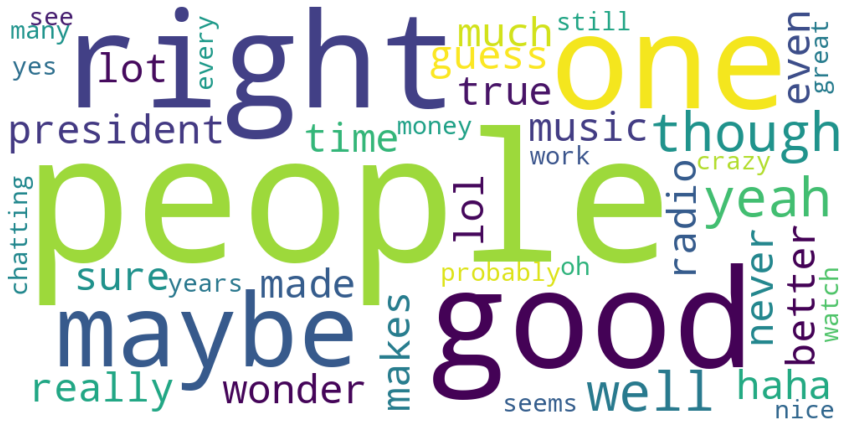

In [50]:
wordcloud = WordCloud(background_color='white', width=1000, height=500).generate(' '.join(top_happy_words))

fig = plt.figure(figsize=(15, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

fig.savefig('lol.png')

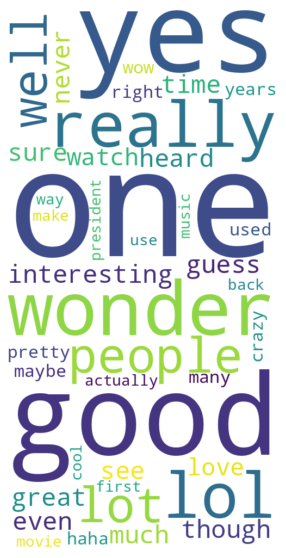

In [51]:
not_bad_answers = ' '.join(happinness_creators[happinness_creators.norm <= 5].reply.tolist())
cnt_clean1 = Counter(list(filter(lambda el: el not in stops, clean_text(not_bad_answers).split())))
top_words = [word for word, _ in cnt_clean1.most_common()[5:50]]
wordcloud1 = WordCloud(background_color='white', width=500, height=1000).generate(' '.join(top_words))
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
sadness_creators[sadness_creators.norm == -20]

,query,reply,norm
404,I just admire Serena for speaking up for wome...,I agree. In 1998 she shaid that both she and...,-20
424,I did like that one. I thought that had a goo...,Definitely. I also like the diversity of the ...,-20
462,Haha. Hawaii passed single payer healthcare i...,"yea I wish we had single payer, my health ins...",-20
747,You are right. I agree with you.,Can you believe that there is a store in Alab...,-20
915,Babe Ruth was a large man. He was not the fle...,that is funny!! talking about babe ruth there...,-20
...,...,...,...
32650,Well I prefer music. But the other day I turn...,"Nice crossover, Ringo in Thomas the Tank Engi...",-20
32654,Did you know there is arrow next to pump symb...,"It should always be in the left side, so Mick...",-20
32682,I like the Cowboys and the Falcons. I was sur...,i like Redskins,-20
32683,i like Redskins,Why do you think the Saints cheerleaders have...,-20


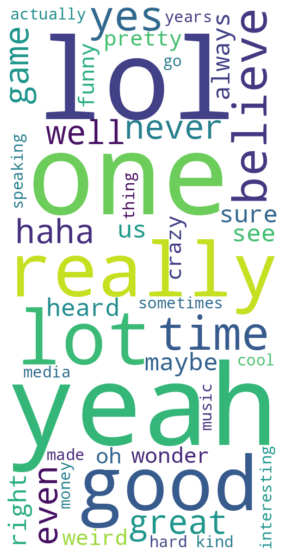

In [54]:
bad_answers = ' '.join(sadness_creators[sadness_creators.norm == -20].reply.tolist())
cnt_clean2 = Counter(list(filter(lambda el: el not in stops, clean_text(bad_answers).split())))
top_words2 = [word for word, _ in cnt_clean2.most_common()[5:50]]
wordcloud2 = WordCloud(background_color='white', width=1000, height=500).generate(' '.join(top_words2))
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
len(set(top_happy_words))

45

In [56]:
len(set(top_words2))

45

In [57]:
len(set(top_happy_words)-set(top_words2))

18

In [58]:
bad_words = set(top_words2) - set(top_happy_words)
bad_words

{'actually',
 'always',
 'believe',
 'cool',
 'funny',
 'game',
 'go',
 'hard',
 'heard',
 'interesting',
 'kind',
 'media',
 'pretty',
 'sometimes',
 'speaking',
 'thing',
 'us',
 'weird'}

In [59]:
good_words = set(top_happy_words) - set(top_words2)
good_words

{'better',
 'chatting',
 'every',
 'guess',
 'makes',
 'many',
 'much',
 'nice',
 'people',
 'president',
 'probably',
 'radio',
 'seems',
 'still',
 'though',
 'true',
 'watch',
 'work'}

In [71]:
def show_cloud(words_collection):
    wc = WordCloud(background_color='white', width=500, height=1000).generate(' '.join(words_collection))
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

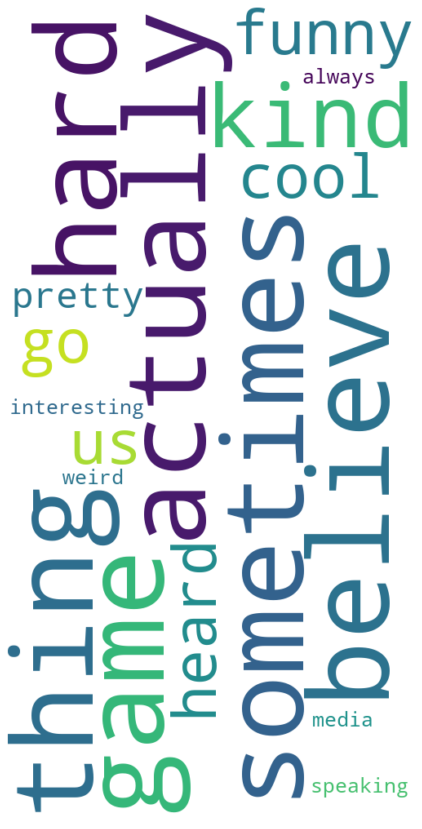

In [72]:
show_cloud(bad_words)

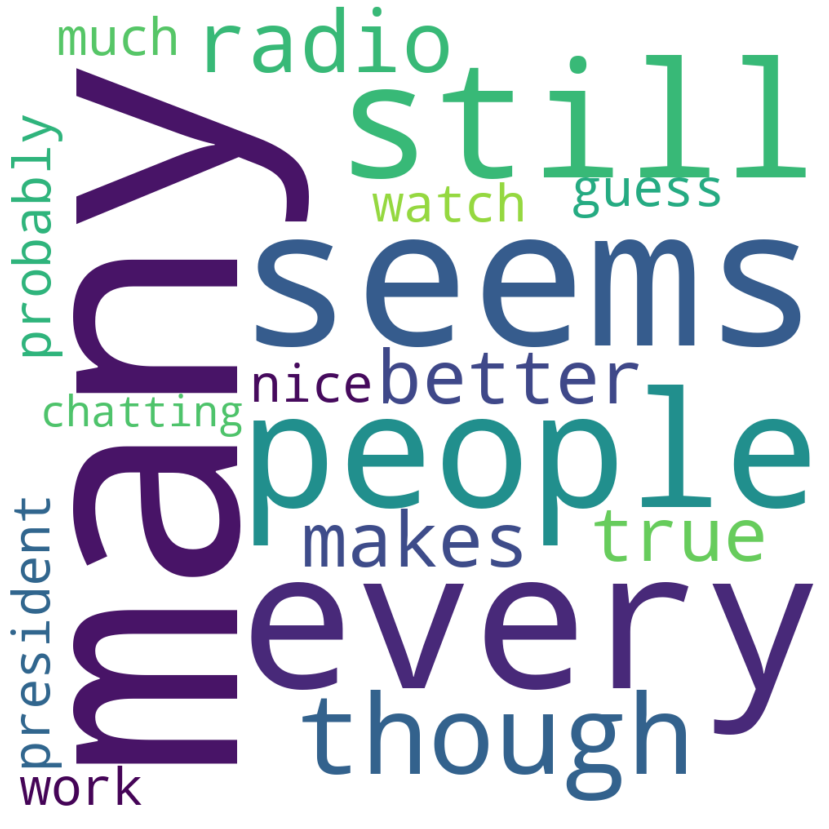

In [68]:
show_cloud(good_words)